# Data cleaning and feature engineering

This takes the original csv files, performs some data cleaning and feature engineering. This effectively reduces the size of the datasets from 2 GB to about 0.9 GB while retaining similar accuracy in the Ridge regression and NN models. This substaintually helps with runtime. 

In [1]:
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from scipy.stats.stats import pearsonr
import time

In [2]:
df_act = {}
df_act_test = {}
for i in range(1, 16):
    df_act[str(i)] = (pd.read_csv('TrainingSet/ACT'+str(i)+'_competition_training.csv'))
    df_act_test[str(i)] = (pd.read_csv('TestSet//ACT'+str(i)+'_competition_test.csv'))
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


Removal of the columns which have all zeros. This should make some of the calculations run a bit faster. 

In [3]:
for i in range(1, len(df_act) + 1):
    sum_1 = np.sum(df_act[str(i)])
    isum_1 = np.array(sum_1.loc[sum_1 == 0].index)
    df_act[str(i)].drop(isum_1, axis = 1, inplace = True)
    df_act_test[str(i)].drop(isum_1, axis = 1, inplace = True)
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


This is to find the correlation between the features and the dependent variable (the activity). This will gives us
some idea of which features have the most importance.

In [4]:
df_corr = {}
for j in range(1, len(df_act)+1):
    corr = list()
    pval = list()
    for i in range(2, len(df_act[str(j)].columns)):
        pears = np.abs(pearsonr(df_act[str(j)].Act, df_act[str(j)].iloc[:,i]))
        corr.append(pears[0])
        pval.append(pears[1])
        dic  = {'corr':corr, 'pval':pval}
    print(j)
    df_corr[str(j)] = pd.DataFrame(dic).sort_values(by='corr', ascending=False)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


In [5]:
# This is to drop all of the NaN values from the correlation data frame
for i in range(1, len(df_corr)+1):
    df_corr[str(i)].dropna(inplace=True)

Visualization of the distribution of the correlation and p-values for Act 1

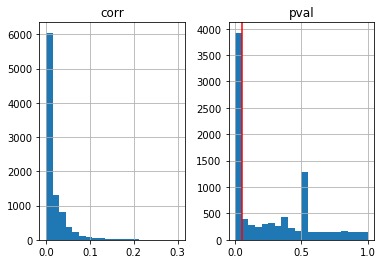

In [35]:
df_corr['1'].hist(bins=20)
plt.axvline(x=0.05, color='r')
plt.show()

In [ ]:
for i in range(1, len(df_corr)+1):
    index_list = np.array(df_corr[str(i)].loc[df_corr[str(i)].pval > .05].index) + 2
    print('i is: ' + str(i))
    col_drop = df_act[str(i)].columns[index_list]         # need the col_drop because df_act will be updated and won't be 
    df_act[str(i)].drop(col_drop, axis=1, inplace=True)   # able to find the index.
    df_act_test[str(i)].drop(col_drop, axis=1, inplace=True)

In [ ]:
# Sending the data back out to CSV so that it can be read again with lower amount of data.
for i in range(1, len(df_act)+1):
    df_act[str(i)].to_csv('feature_updates/train_act'+str(i)+'.csv')
    df_act_test[str(i)].to_csv('feature_updates/test_act'+str(i)+'.csv')